# Visualising Asset Price Correlations

In [182]:
#Importing libraries 

import networkx as nx 
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

### Correlation Matrix 

In [183]:
#Loading csv file 
asset_prices = pd.read_csv('asset_prices.csv')

#Making the row/column labels shorter by removing EOD~ at the beginning and .11 at the end
asset_prices.columns = asset_prices.columns.str.replace("EOD~", "")
asset_prices.columns = asset_prices.columns.str.replace(".11", "")

#Creating correlation matrix 
corr_df = asset_prices.corr()

#Printing the first few rows of the matrix 
corr_df.head()

,BND,DBC,DIA,EEM,EFA,EMB,EPP,EWG,EWI,EWJ,...,VGK,VPL,VXX,XLB,XLE,XLF,XLK,XLU,CSJ,FXF
BND,1.000000,-0.822062,0.794479,0.069905,0.114368,0.912854,0.119582,0.099310,-0.482615,0.638039,...,-0.037230,0.536324,-0.900317,0.597031,-0.613705,0.689425,0.845532,0.941027,0.934951,-0.769985
DBC,-0.822062,1.000000,-0.574282,0.349666,0.200079,-0.600426,0.325952,0.228763,0.600429,-0.472528,...,0.333239,-0.215966,0.773717,-0.238640,0.895370,-0.509694,-0.644009,-0.717165,-0.713552,0.870505
DIA,0.794479,-0.574282,1.000000,0.468724,0.563945,0.917934,0.519725,0.568437,-0.070294,0.897045,...,0.412195,0.875397,-0.883305,0.898652,-0.346392,0.975872,0.988677,0.910599,0.917660,-0.657030
EEM,0.069905,0.349666,0.468724,1.000000,0.906563,0.383581,0.968244,0.871560,0.609441,0.553773,...,0.872187,0.788827,-0.162012,0.743330,0.522937,0.488016,0.403966,0.239615,0.227668,0.224999
EFA,0.114368,0.200079,0.563945,0.906563,1.000000,0.412868,0.881808,0.961832,0.722791,0.701312,...,0.975473,0.852729,-0.274274,0.759922,0.333035,0.596364,0.504831,0.291689,0.308123,0.135446


Looking at the correlation matrix above, I realised that it is actually the adjancency matrix of the network. Since it represents a weighted graph, there are values other than 0 and 1. In adition, the fact that the diagonal entries are 1 instead of zero implies that there are self loops in this graph. This makes sense as assets are perfectly correlated to themselves. Finally, since it seems to be a symmetric matrix, we are dealing with an undirected graph. 

### Plotting Network

In order to plot the correlation matrix as a network, we first store the row labels from the above data frame (since they repsesent the node names)

In [184]:
nodes = corr_df.index.values 

The graph is then created in the following way: 

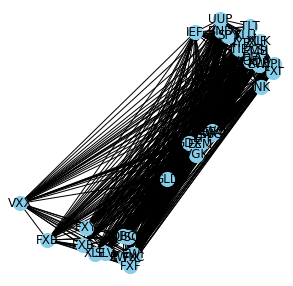

In [185]:
#Converting corr_matrix data frame to a matrix 
corr_matrix = np.asmatrix(corr_df) 

#Creating graph 
G = nx.from_numpy_matrix(corr_matrix) 

#Adding the labels that we created and stored in 'nodes'
G = nx.relabel_nodes(G,lambda x: nodes[x])

#Display graph function
def display_graph(nx_graph):

    plt.subplots(figsize=(5, 5))
    nx.draw_spring(nx_graph, with_labels = True, node_color='skyblue', node_size=200, \
                   edge_color='black')
    plt.show()

#Visualising Graph
display_graph(G)

As we can see from above, the graph is extremely dense and impossible to draw inference from due to the high number of overlapping edges. Perhaps it would be neater if the nodes were arranged in a circular manner, so that we get a better understanding of how the stocks are connected with each other. 

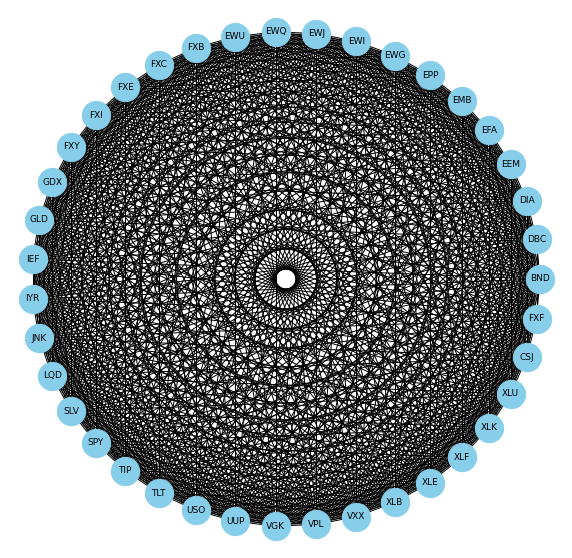

In [186]:
#Amending the function above
def display_circular(nx_graph):
    
    #Making the figure larger
    plt.subplots(figsize=(10, 10))
    
    #Drawing a circular layout 
    nx.draw_circular(nx_graph, node_color='skyblue', node_size=800, \
            edge_color='black')
    
    #Changing label font
    nx.draw_networkx_labels(nx_graph, nx.circular_layout(G), font_size=9)

    plt.show()

#Visualising Graph
display_circular(G)

Despite the high density of the plot, the circular layout seems to be more appropriate for the purpose of this investigation. Another possible way of visualising this network would be to use a matrix plot, which can be achieved by producing a correlation heat map using the seaborn package. As we can see below, the fact that the adjacency matrix is symmetric becomes more obvious. In addition, it is now easier to examine the correlation nature between different assets, thanks to the colour scale used. 

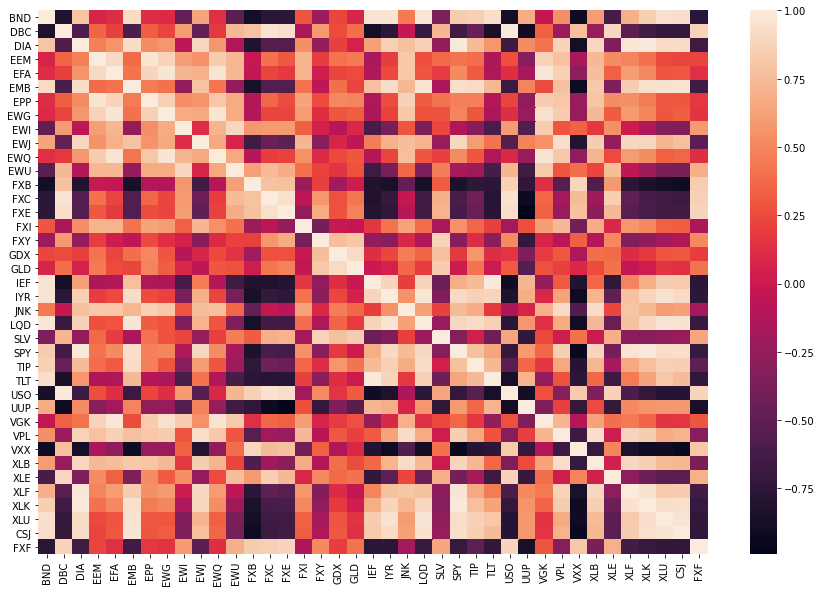

In [187]:
plt.subplots(figsize=(15, 10))

sns.heatmap(corr_df, annot = False)

plt.show()

For the purpose of this project, the circular layout will be used so as to allow for the experimentation of different node and edge characteristics such as colour and size. 

### Enhancing Plot

#### Changing width and colour of edges 

The circular network plot produced in part B will now be amended first by changing the edge width based on their weight (correlation). The colors of the nodes will also be amended based on whether the correlation is positive or negative.  

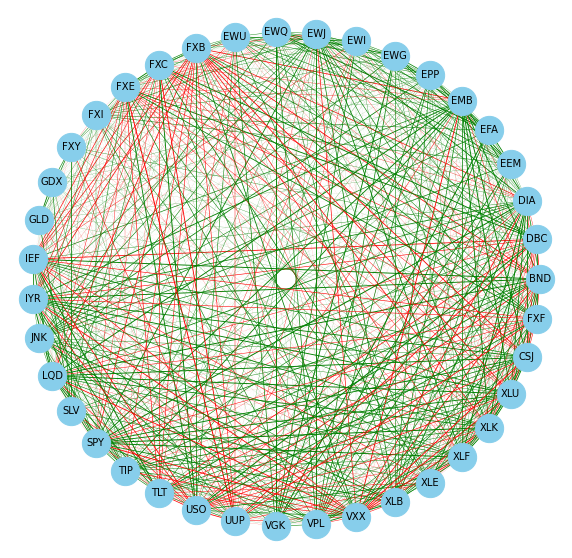

In [191]:
plt.subplots(figsize=(10, 10))

edges = G.edges()
weights = [abs(G[u][v]['weight'])**2 for u,v in edges] #taking absolute value of correlations

colors = [] #creating empty colors list

for u,v in edges:
    if G[u][v]['weight'] < 0:      #if correlation is negative change the edge color to red
        colors.append('red')
    else:
        colors.append('green')     #if correlation is positive change edge color to green

nx.draw_circular(G, edges=edges, edge_color=colors, width=weights, node_color='skyblue', node_size=800)

nx.draw_networkx_labels(G, nx.circular_layout(G), font_size=10)

plt.show()

#### Separating Positive from Negative Correlations

Due to the density of the plot, it is still quite hard to draw useful insight about the correlations between assets. In order to distinguish between positive and negative correlations, two separate networks will be created: One containing all the positive correlations, and one containing all negative. 

In [192]:
#Defining new function 

def display_circular_edit(nx_graph, weights, color, pos, title):
    
    #The positive and negative graphs will be displayed side by side so we are using the subplot method
    plt.subplot(pos)
    
    #Drawing a circular layout 
    nx.draw_circular(nx_graph, node_color=color, width=weights, node_size=700, \
            edge_color=color)
    
    #Changing label font
    nx.draw_networkx_labels(nx_graph, nx.circular_layout(G), font_size=10)

    #Adding a title for each plot
    plt.title(title)

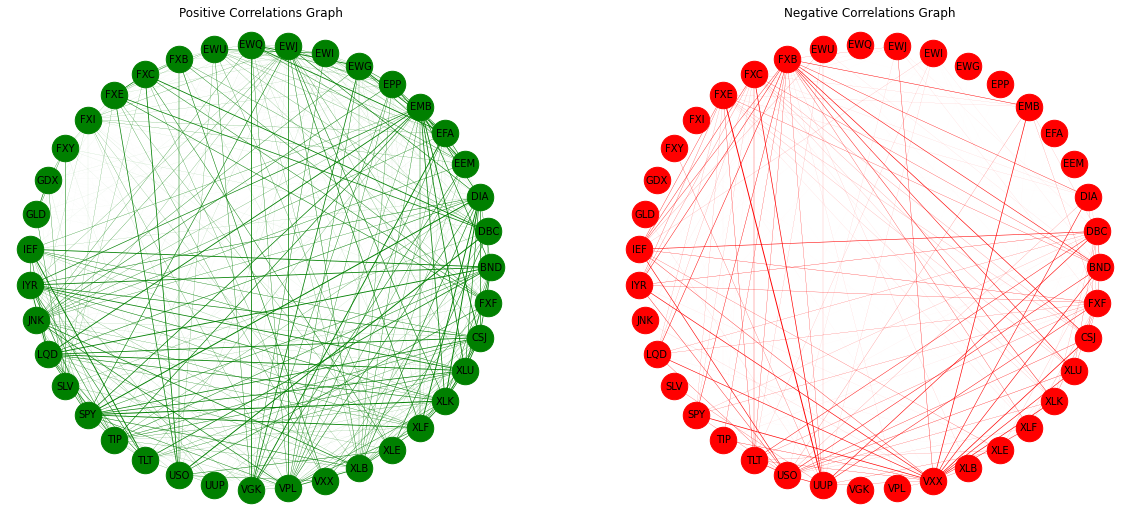

In [193]:
P = G.copy() #Positive Correlations Network
N = G.copy() #Negative Correlations Network

for u,v in edges:
    if G[u][v]['weight'] < 0:      #if correlation is negative, remove edge from positive graph
        P.remove_edge(u, v)
    elif G[u][v]['weight'] > 0:
        N.remove_edge(u, v)        #if correlation is positive, remove edge from negative graph

P_edges = P.edges()
N_edges = N.edges()

P_weights = [P[u][v]['weight']**5 for u,v in P_edges] 
N_weights = [abs(N[u][v]['weight'])**5 for u,v in N_edges] #taking absolute value of correlations

#Displaying Plots

plt.subplots(figsize=(20, 9))

display_circular_edit(P, P_weights, 'green', 121, 'Positive Correlations Graph')
display_circular_edit(N, N_weights, 'red', 122, 'Negative Correlations Graph')

plt.show()

In the two graphs above, the weights (correlations of the edges) where raised to the power of 5. As a result, the value of all correlations has decreased, making weak correlation edges very faint on the graphs. This allows us to see more clearly the assets that are more strongly correlated with each other. 

#### Changing node size depending on node degree 

A further change that can be made, is to alter the size of the nodes depending on their degree. This is done as follows: 

In [194]:
#Re-defining function

def display_circular_edit2(nx_graph, weights, nodes, color, pos, title):
    
    #The positive and negative graphs will be displayed side by side so we are using the subplot method
    plt.subplot(pos)
    
    #Drawing a circular layout 
    nx.draw_circular(nx_graph, node_color=color, width=weights, node_size=[v ** 2 for v in nodes.values()], \
            edge_color=color)
    
    #Changing label font
    nx.draw_networkx_labels(nx_graph, nx.circular_layout(nx_graph), font_size=10)

    #Adding a title for each plot
    plt.title(title)

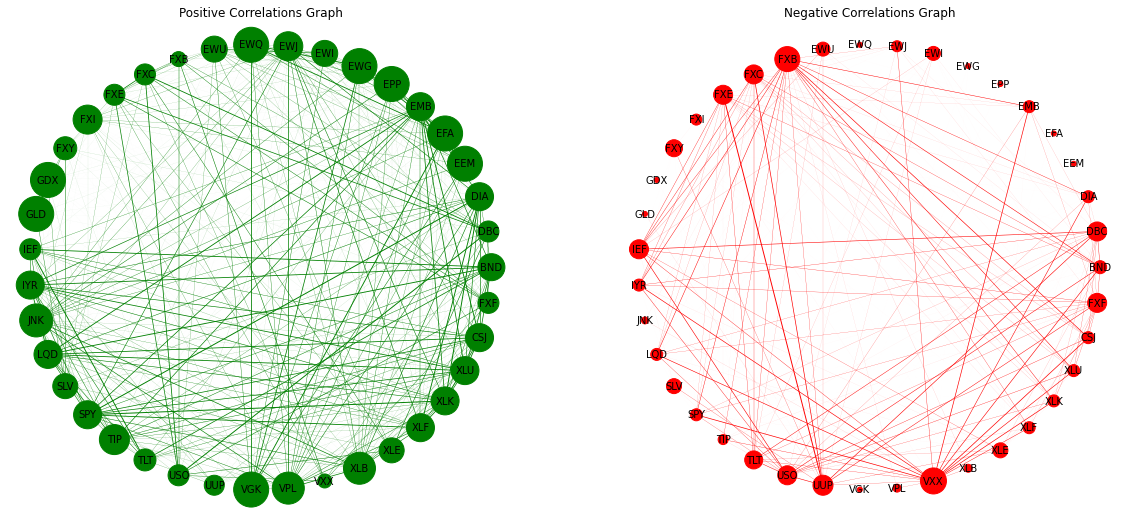

In [195]:
#Creating dictionaries with degree values of each node

P_deg = dict(P.degree)
N_deg = dict(N.degree)

#Displaying Plots 

plt.subplots(figsize=(20, 9))

display_circular_edit2(P, P_weights, P_deg, 'green', 121, 'Positive Correlations Graph')
display_circular_edit2(N, N_weights, N_deg, 'red', 122, 'Negative Correlations Graph')

plt.show()

#### Changing node size depending on respective edge weights

A node can have a high degree (eg. many positive nodes) but that doesn't necessarily mean that it influences many nodes significantly. It might be the case that an asset is positively correlated with 90% of the assets, but the correlation weights might be too small. Therefore, as a final approach, the size of the nodes was determined by the sum of the weights of its respective edges.

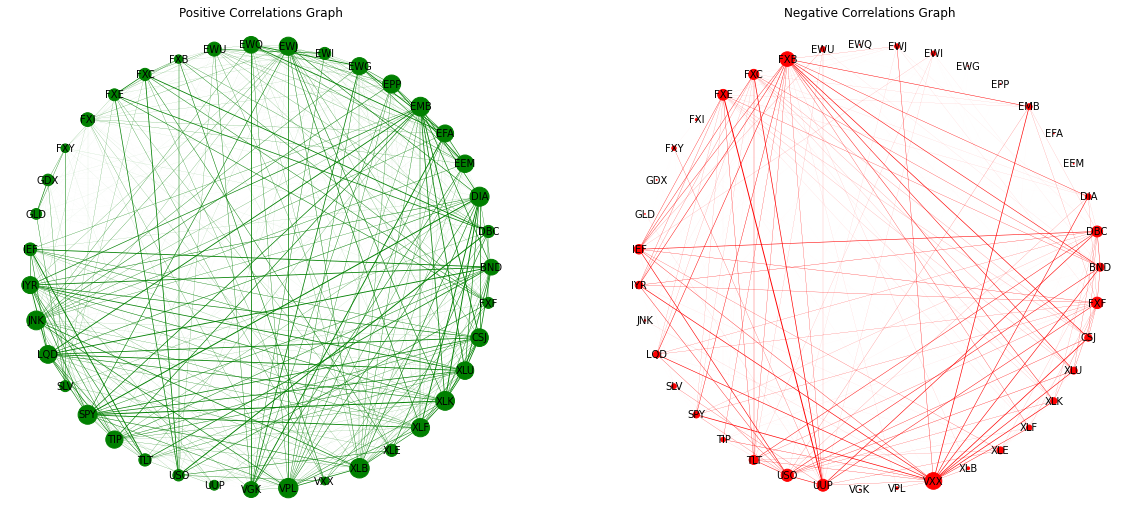

In [196]:
#Creating empty dictionaries to store correlation sums for each network

P_corrs = {}
N_corrs = {}

#For loop that calculates sum of edge weights equivalent to each node and stores it to the above dictionaries

for asset in nodes: 
    P_corrs[asset] = 0
    N_corrs[asset] = 0
    for u, v in P.edges: 
            if u == asset or v == asset: 
                P_corrs[asset] += P[u][v]['weight']
    for u, v in N.edges: 
            if u == asset or v == asset: 
                N_corrs[asset] += abs(N[u][v]['weight'])

#Displaying plots

plt.subplots(figsize=(20, 9))
                
display_circular_edit2(P, P_weights, P_corrs, 'green', 121, 'Positive Correlations Graph')
display_circular_edit2(N, N_weights, N_corrs, 'red', 122, 'Negative Correlations Graph')

plt.show()

We can now see clearly that the VXX asset on the red graph for example, is strongly negatively correlated with a large number of assets and is thus quite influential. Similarly, we can also see in both graphs that GLD doesn't have any strong positive or negative correlations with other assets. This is further backed up by general financial theory which states that there is an overall lack of correlation between returns on gold and those on financial assets.
(source: http://www.spdrgoldshares.com/media/GLD/file/colin_lawrence_report.pdf) 